In [5]:
#import dependenceis
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [6]:
#view data sources
ILI_data_path = '../OriginalData/ILINet.csv'
clin_data_path = '../OriginalData/WHO_NREVSS_Clinical_Labs.csv'
#pub_data_path = 'FluViewPhase2Data (2)/WHO_NREVSS_Public_Health_Labs.csv'

#read data sources
ILI_data = pd.read_csv(ILI_data_path, skiprows = 1)
clin_data = pd.read_csv(clin_data_path)
#pub_data = pd.read_csv(pub_data_path)


In [54]:
#view ILI
ILI_df = pd.DataFrame(ILI_data)

#remove null values in full columns
ILI_drop = ILI_df.drop(columns = ['NUM. OF PROVIDERS', '% WEIGHTED ILI','AGE 0-4','AGE 25-49', 'AGE 25-64', 'AGE 5-24', 'AGE 50-64','AGE 65'])

#remove any rows that contain X
ILI_drop2 = ILI_drop[ILI_drop['%UNWEIGHTED ILI'] != 'X']
ILI_drop2 = ILI_drop[ILI_drop['ILITOTAL'] != 'X']
#ILI_drop2 = ILI-drop[ILI_drop['TOTAL PATIENTS'] != 'X']


#convert datatypes of columns to float
ILI_drop2 = ILI_drop2[['YEAR', 'WEEK', 'ILITOTAL', 'TOTAL PATIENTS']].astype(int)


#clean ILI
nxt_ILI = ILI_drop2

nxt_ILI.head(26)

,YEAR,WEEK,ILITOTAL,TOTAL PATIENTS
0,2016,40,169,7599
1,2016,40,14,1489
2,2016,40,309,25032
3,2016,40,40,4360
4,2016,40,668,53317
5,2016,40,22,2836
6,2016,40,64,5180
7,2016,40,3,2861
8,2016,40,160,2896
10,2016,40,903,55581


In [61]:
#clean weeks. . .
#Spring - starts the third week of March (month 3) --> March week 3 to June week 2 --> week 12 to week 24

weeks = nxt_ILI['WEEK']
ILI_max = nxt_ILI['ILITOTAL'].sum()

ILI_spring = 0
ILI_summer = 0
ILI_fall = 0
ILI_winter = 0

for row in weeks:
    if row >= 12 & row <= 24:
        ILI_total = nxt_ILI['ILITOTAL']
        ILI_spring = ILI_spring + ILI_total[12]
    if row >= 25 & row <= 37:
        ILI_total = nxt_ILI['ILITOTAL']
        ILI_summer = ILI_summer + ILI_total[25]  
    if row >= 38 & row <= 50:
        ILI_total3 = nxt_ILI['ILITOTAL']
        ILI_fall = ILI_fall + ILI_total3[38]
    #if row == 51 | row == 52:
        #ILI_total = nxt_ILI['ILITOTAL']
        #ILI_winter = ILI_winter + ILI_total
    if row >= 1 & row <= 12:
        ILI_total = nxt_ILI['ILITOTAL']
        ILI_winter = ILI_winter + ILI_total[1]


print(ILI_spring)
print(ILI_summer)
print(ILI_fall)
print(ILI_winter)
print(ILI_max)

#Summer - starts the third week of June (month 6) --> June week 3 to September week 2 --> week 25 to week 37
#Fall - starts the third week of September (month 9) --> September week 3 to December week 2 --> week 38 to week 50
#Winter - starts the third week of December (month 12) --> December week 3 to March week 2 --> week 51, 52, and week 1 to week 11

110240
716560
1554384
154336
5416542


In [29]:
#ILI df to csv for merge
nxt_ILI.to_csv('ILI.csv',index=False)


In [68]:
#new data with only season and ILI data for plot

ILI_vals = []
ILI_vals.append(ILI_spring)
ILI_vals.append(ILI_summer)
ILI_vals.append(ILI_fall)
ILI_vals.append(ILI_winter)

ILI_seasons = []
ILI_seasons.append('Spring')
ILI_seasons.append('Summer')
ILI_seasons.append('Fall')
ILI_seasons.append('Winter')

print(ILI_vals)
print(ILI_seasons)

[110240, 716560, 1554384, 154336]
['Spring', 'Summer', 'Fall', 'Winter']


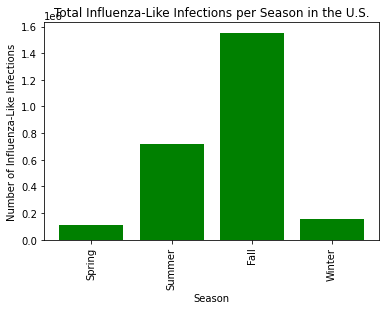

In [69]:
#ILI bar graph: x-axis = season (weeks), y-axis = num ILI

plt.bar(ILI_seasons, ILI_vals, color='green')
plt.xticks(rotation=90)
plt.xlabel('Season')
plt.ylabel('Number of Influenza-Like Infections')
plt.title('Total Influenza-Like Infections per Season in the U.S.')
plt.show()